In [14]:
import tensorflow as tf
import zipfile
import os
import csv
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
def get_data(filename):
    
    with open(filename) as Training_file:
        csv_reader = csv.reader(Training_file, delimiter = ',')
        train_labels = []
        train_image=  []
        first_line = True
        
    
        for row in csv_reader:
            if first_line:
                print('ignoring first line')
                first_line = False
            
            else:
                train_labels.append(row[0])  # The first value is the label
                
                image_data = row[1:785] # Each successive line contians 785 comma separated values between 0 and 255
                image_data_as_array = np.array_split(image_data,28) #np.array_split to turn the 784 pixels into 28x28
                train_image.append(image_data_as_array)
                 # You are reading in strings, but need the values to be floats
                 # Check out np.array().astype for a conversion
        labels = np.array(train_labels).astype('float')
        images = np.array(train_image).astype('float')
        
    return labels, images

In [3]:
training_labels, training_images = get_data('sign_mnist_train.csv')

ignoring first line


In [4]:
testing_labels, testing_images = get_data('sign_mnist_test.csv')

ignoring first line


In [5]:
print('shape of the training_image: ',training_images.shape)
print('shape of the training_labels: ', training_labels.shape)
print('shape of the test_images: ', testing_images.shape)
print('shape of the test_labels', testing_labels.shape)

shape of the training_image:  (27455, 28, 28)
shape of the training_labels:  (27455,)
shape of the test_images:  (7172, 28, 28)
shape of the test_labels (7172,)


In [6]:
training_images = np.expand_dims(training_images, axis = 3)

In [7]:
testing_images = np.expand_dims(testing_images, axis = 3)

In [8]:
# Create an ImageDataGenerator and do Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255., 
                                   rotation_range = 40,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest',
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2 )


validation_datagen = ImageDataGenerator(rescale = 1.0/ 255.)





In [9]:
print(training_images.shape)
print(testing_images.shape)


(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [10]:
# Define the model

model = keras.models.Sequential([
                keras.layers.Conv2D(64, (3,3), activation = 'relu',input_shape = (28, 28, 1)),
                keras.layers.MaxPooling2D(2,2),
                keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                keras.layers.MaxPooling2D(2,2),
                keras.layers.Flatten(),
                keras.layers.Dense(128, activation = 'relu'),
                keras.layers.Dense(26, activation = 'softmax')
        
])

In [11]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [12]:
train_generator = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=32)



validation_generator = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=32)


In [13]:
history = model.fit(train_generator,
                              steps_per_epoch = len(training_images)/32,
                              epochs = 50,
                              validation_data = validation_generator,
                              validation_steps = len(testing_images)/32)

Epoch 1/50
858/857 [==============================] - 331s 386ms/step - loss: 2.9047 - accuracy: 0.1239 - val_loss: 2.4169 - val_accuracy: 0.2068
Epoch 2/50
858/857 [==============================] - 333s 388ms/step - loss: 2.2093 - accuracy: 0.3067 - val_loss: 1.6374 - val_accuracy: 0.4509
Epoch 3/50
858/857 [==============================] - 330s 385ms/step - loss: 1.8773 - accuracy: 0.3943 - val_loss: 1.4799 - val_accuracy: 0.4834
Epoch 4/50
858/857 [==============================] - 342s 398ms/step - loss: 1.6212 - accuracy: 0.4711 - val_loss: 1.3087 - val_accuracy: 0.5657
Epoch 5/50
858/857 [==============================] - 328s 382ms/step - loss: 1.4515 - accuracy: 0.5257 - val_loss: 0.9726 - val_accuracy: 0.6630
Epoch 6/50
858/857 [==============================] - 326s 380ms/step - loss: 1.3293 - accuracy: 0.5606 - val_loss: 0.8657 - val_accuracy: 0.6963
Epoch 7/50
858/857 [==============================] - 331s 386ms/step - loss: 1.2194 - accuracy: 0.5938 - val_loss: 0.7876 -

In [23]:
model.evaluate(testing_images, testing_labels)

225/225 [==============================] - 30s 134ms/step - loss: 720.0535 - accuracy: 0.4214


[720.0535278320312, 0.4213608503341675]

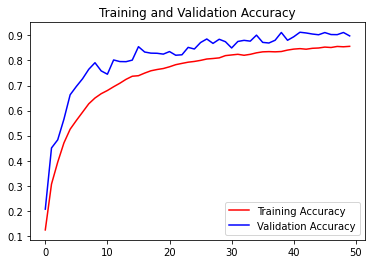

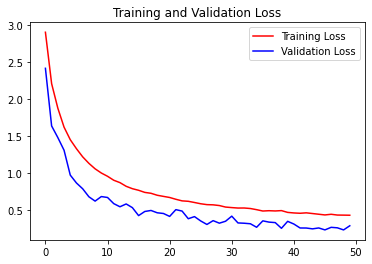

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc = 0)
plt.figure()


plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()